In [1]:
from utils4notebooks import *

/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)



RUNNING BOTH PREDICTED AND RANDOM EMBEDDING ANALYSES

ANALYSIS 1: LOADED EMBEDDINGS (PREDICTED)
RNA embeddings shape: (2276, 64)
Protein embeddings shape: (5711, 64)

Running analysis: Loaded Embeddings
Using prediction prefix: pred_protein_
Computing spot-level predictions...
Similarity matrix shape: torch.Size([5711, 2276])
Top-k scores shape: torch.Size([5711, 3]), Top-k indices shape: torch.Size([5711, 3])
Weights shape: torch.Size([5711, 3])
Predicted proteins shape: (2276, 2484)
Predicted proteins at spots shape: torch.Size([5711, 2484])
Loading ground truth data...


/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Preparing validation data...
Number of overlapping proteins: 49
Using prediction prefix: pred_protein_
Computing correlations...

Filtering for region 1 and cell type malignant/stromal in column sc/sn compartments...

Correlation results for region 1 and cell type malignant/stromal:

ANALYSIS 2: RANDOM EMBEDDINGS
RNA embeddings shape: (2276, 64)
Protein embeddings shape: (5711, 64)
Random RNA embeddings shape: (2276, 64)
Random Protein embeddings shape: (5711, 64)

Running analysis: Random Embeddings
Using prediction prefix: rand_pred_protein_
Computing spot-level predictions...
Similarity matrix shape: torch.Size([5711, 2276])
Top-k scores shape: torch.Size([5711, 3]), Top-k indices shape: torch.Size([5711, 3])
Weights shape: torch.Size([5711, 3])
Predicted proteins shape: (2276, 2484)
Predicted proteins at spots shape: torch.Size([5711, 2484])
Loading ground truth data...
Preparing validation data...
Number of overlapping proteins: 49
Using prediction prefix: rand_pred_protein_


/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Computing correlations...

Filtering for region 1 and cell type malignant/stromal in column sc/sn compartments...

Correlation results for region 1 and cell type malignant/stromal:


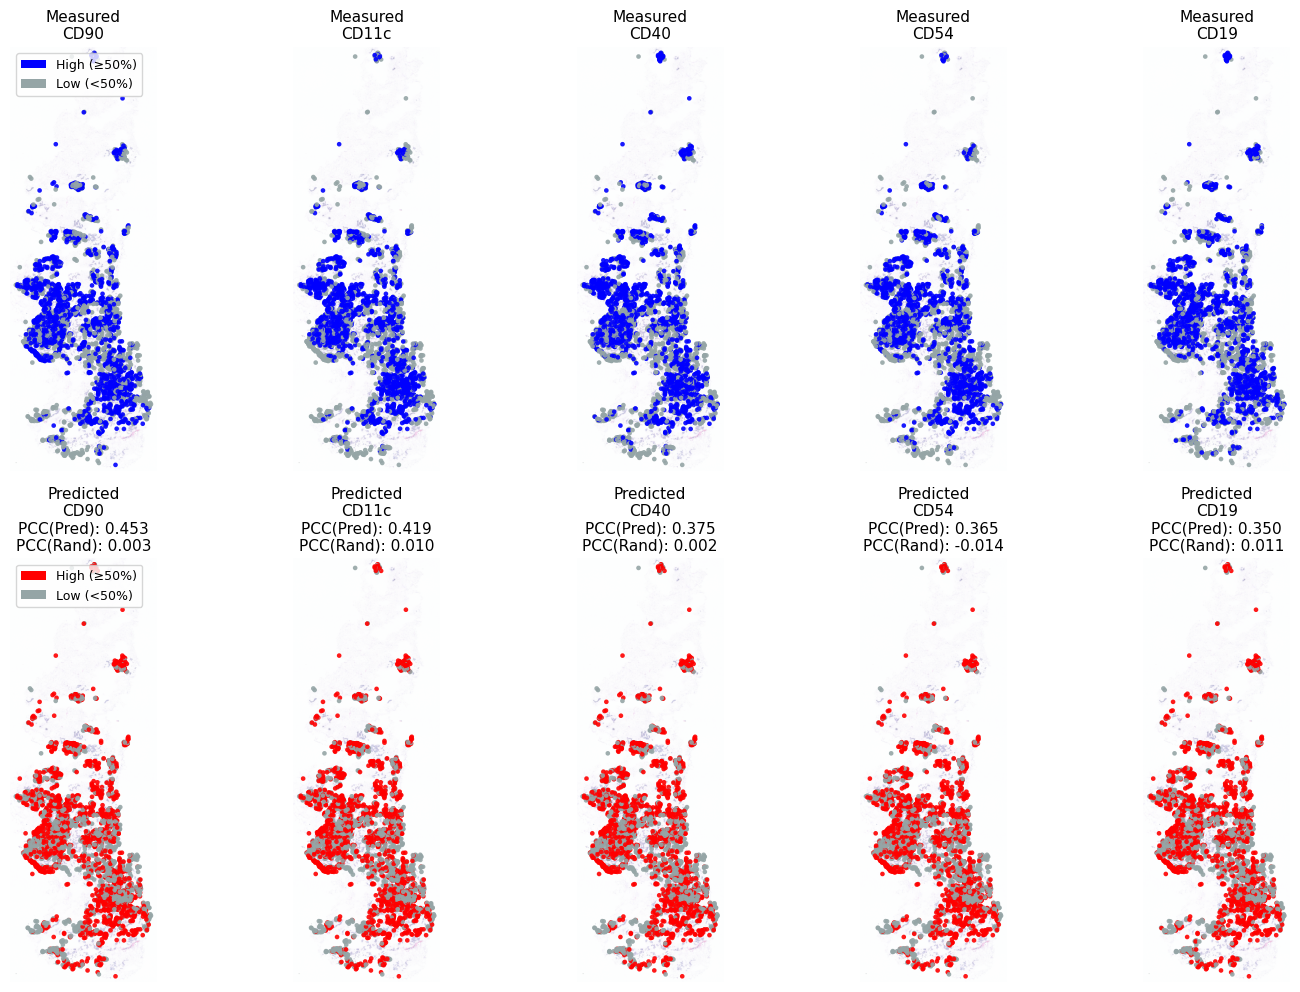


RUNNING BOTH PREDICTED AND RANDOM EMBEDDING ANALYSES

ANALYSIS 1: LOADED EMBEDDINGS (PREDICTED)
RNA embeddings shape: (2276, 64)
Protein embeddings shape: (5711, 64)

Running analysis: Loaded Embeddings
Using prediction prefix: pred_protein_
Computing spot-level predictions...
Similarity matrix shape: torch.Size([5711, 2276])
Top-k scores shape: torch.Size([5711, 3]), Top-k indices shape: torch.Size([5711, 3])
Weights shape: torch.Size([5711, 3])
Predicted proteins shape: (2276, 2484)
Predicted proteins at spots shape: torch.Size([5711, 2484])
Loading ground truth data...


/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Preparing validation data...
Number of overlapping proteins: 49
Using prediction prefix: pred_protein_
Computing correlations...

Filtering for region 1 and cell type lymphoid in column sc/sn compartments...

Correlation results for region 1 and cell type lymphoid:

ANALYSIS 2: RANDOM EMBEDDINGS
RNA embeddings shape: (2276, 64)
Protein embeddings shape: (5711, 64)
Random RNA embeddings shape: (2276, 64)
Random Protein embeddings shape: (5711, 64)

Running analysis: Random Embeddings
Using prediction prefix: rand_pred_protein_
Computing spot-level predictions...
Similarity matrix shape: torch.Size([5711, 2276])
Top-k scores shape: torch.Size([5711, 3]), Top-k indices shape: torch.Size([5711, 3])
Weights shape: torch.Size([5711, 3])
Predicted proteins shape: (2276, 2484)
Predicted proteins at spots shape: torch.Size([5711, 2484])
Loading ground truth data...


/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Preparing validation data...
Number of overlapping proteins: 49
Using prediction prefix: rand_pred_protein_
Computing correlations...

Filtering for region 1 and cell type lymphoid in column sc/sn compartments...

Correlation results for region 1 and cell type lymphoid:


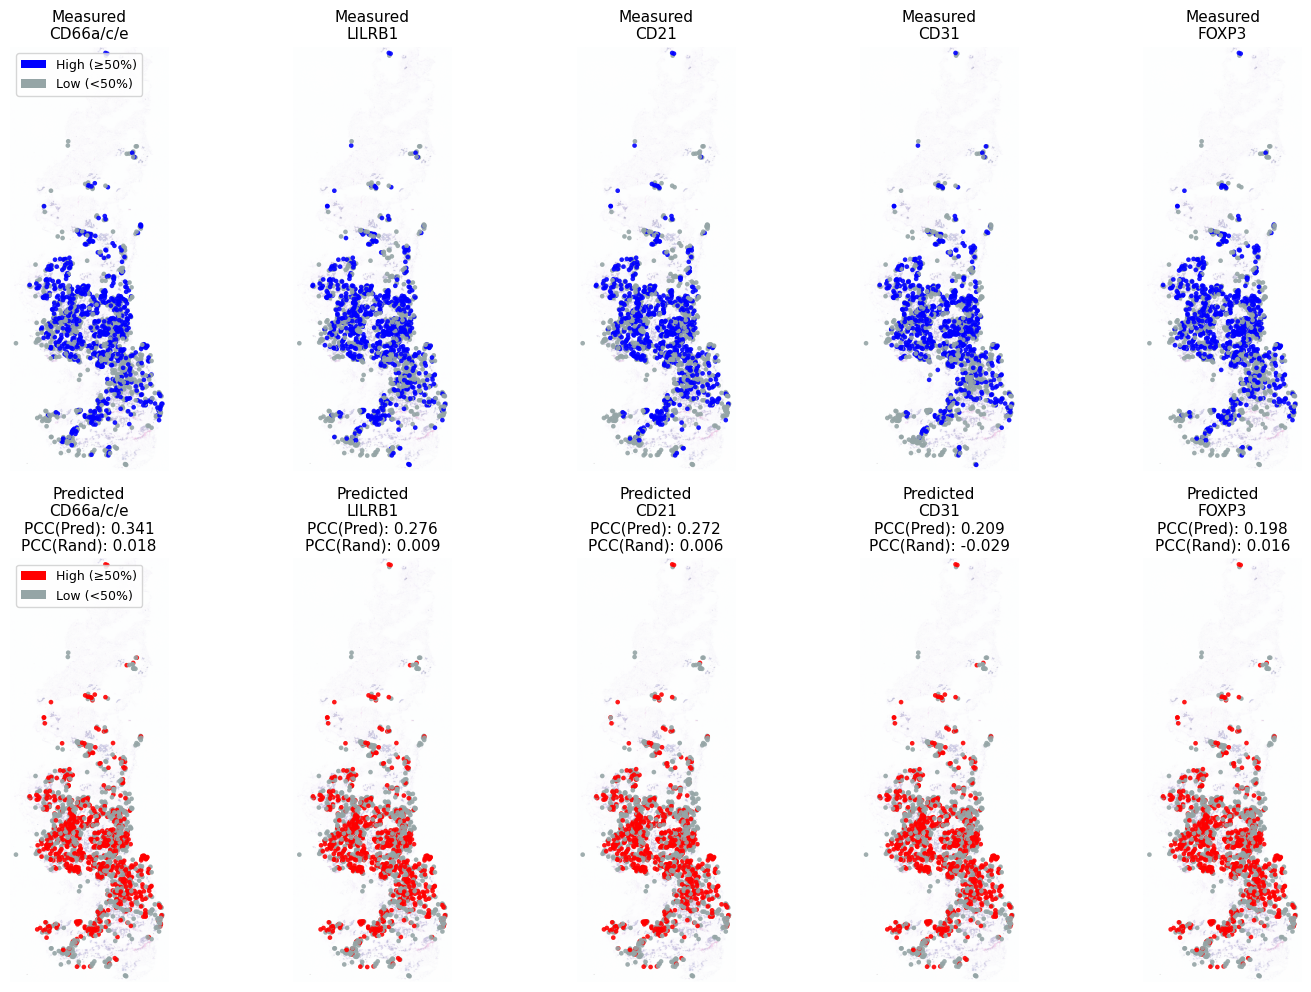

In [2]:


# Configuration paths
rna_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_breast_rna_embeddings.pickle'
protein_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_breast_protein_embeddings.pickle'
scRNA_pred_path = '/raid/home/yoyowu/spatialpro/prediction/HTAPP_breast_scRNA_with_predicted_proteins_2484.h5ad'
scP_truth_path = '/raid/home/yoyowu/spatialpro/data/HTAPP/breast_mar12_protein_w_ID.h5ad'
fake_p_file_path = '/raid/home/yoyowu/spatialpro/prediction/scP_artificial_HTAPP_n_breast.h5ad'
k=3
region = 1
cell_type_col='sc/sn compartments' 


# Load protein mapping
prot_map = pd.read_csv("/raid/home/yoyowu/spatialpro/data/may14_2484_prot_mapping.csv")
prot_id_to_name = dict(zip(prot_map['MYID'], prot_map['Approved symbol']))
# cell_type_value='malignant/stromal'
# cell_type_value = 'lymphoid'


#----------------------- now plot the top pcc proteins in the main compartment -----------------------#
for cell_type_value in ['malignant/stromal', 'lymphoid']:

    print("\n" + "="*70)
    print("RUNNING BOTH PREDICTED AND RANDOM EMBEDDING ANALYSES")
    print("="*70)

    # Store results for both cases
    all_results = {}

    # 1. Run with LOADED embeddings (predicted)
    print("\n" + "="*70)
    print("ANALYSIS 1: LOADED EMBEDDINGS (PREDICTED)")
    print("="*70)
    rna_embeddings, protein_embeddings = load_embeddings(rna_path, protein_path)
    all_results['loaded'], scP_truth_loaded = run_analysis(
        rna_embeddings, protein_embeddings, 
        scRNA_pred_path=scRNA_pred_path, k=k,fake_p_file_path=fake_p_file_path,
        scP_truth_path=scP_truth_path,
        label = "Loaded Embeddings", 
        region=region, 
        cell_type_col=cell_type_col, 
        cell_type_val=cell_type_value,
        pred_prefix='pred_protein_'
    )

    # 2. Run with RANDOM embeddings
    print("\n" + "="*70)
    print("ANALYSIS 2: RANDOM EMBEDDINGS")
    print("="*70)
    temp_rna, temp_protein = load_embeddings(rna_path, protein_path)
    rna_embeddings_random, protein_embeddings_random = initialize_random_embeddings(
        temp_rna.shape, temp_protein.shape, seed=42
    )
    all_results['random'], scP_truth_random = run_analysis(
        rna_embeddings_random, protein_embeddings_random, 
        scRNA_pred_path=scRNA_pred_path, k=k,fake_p_file_path=fake_p_file_path,
        scP_truth_path=scP_truth_path,
        label = "Random Embeddings",
        region=region,
        cell_type_col=cell_type_col,
        cell_type_val=cell_type_value,
        pred_prefix='rand_pred_protein_'
    )

    # Use the loaded scP_truth as base and add random predictions
    scP_truth = scP_truth_loaded.copy()

    top5_loaded_proteins = all_results['loaded']['top5_proteins'].index.tolist()
    pcc_pred_top = {}
    pcc_rand_top = {}
    for myid in top5_loaded_proteins:
        # Get PCC from loaded (predicted) vs measured
        pcc_pred_top[myid] = all_results['loaded']['df_overall'].loc[myid, 'Pearson']
        # Get PCC from random vs measured
        pcc_rand_top[myid] = all_results['random']['df_overall'].loc[myid, 'Pearson']



    # Plot
    fig, axes = plot_top_proteins_immune_high_vs_low(
        adata=scP_truth,
        img_path="/raid/home/yoyowu/spatialpro/data/HTAPP/HTAPP-783-SMP-4081_HE_1_processed.jpg",
        top_myids=top5_loaded_proteins,
        pcc_pred_dict=pcc_pred_top,
        pcc_rand_dict=pcc_rand_top,
        region=region,
        cell_type_col='sc/sn compartments',
        cell_type_value=cell_type_value,
        percentile_threshold=50,
        spot_radius=20,
        alpha=0.9,
        main_fig_size=(15, 10),
        background_alpha=0.3
        )

    # plt.savefig(f"liver_top5_proteins_{cell_type_value.replace('/', '_')}_high_vs_low.png", dpi=150, bbox_inches='tight')  
    plt.show()


In [3]:

# 3. Merge both predictions into one scP_truth object
print("\n" + "="*70)
print("MERGING PREDICTIONS")
print("="*70)

# Use the loaded scP_truth as base and add random predictions
scP_truth = scP_truth_loaded.copy()

# # Add random prediction columns
# pred_MYID_list = all_results['random']['pred_MYID_list']
# for myid in pred_MYID_list:
#     rand_col = f"rand_pred_protein_{myid}"
#     if rand_col in scP_truth_random.obs.columns:
#         scP_truth.obs[rand_col] = scP_truth_random.obs[rand_col].values


# Add random prediction columns in bulk
pred_MYID_list = all_results['random']['pred_MYID_list']
rand_pred_columns = {
    f"rand_pred_protein_{myid}": scP_truth_random.obs[f"rand_pred_protein_{myid}"].values 
    for myid in pred_MYID_list 
    if f"rand_pred_protein_{myid}" in scP_truth_random.obs.columns
}

if rand_pred_columns:
    scP_truth.obs = pd.concat([
        scP_truth.obs, 
        pd.DataFrame(rand_pred_columns, index=scP_truth.obs.index)
    ], axis=1)
    print(f"Added {len(rand_pred_columns)} random prediction columns")
else:
    print("Warning: No random prediction columns found to add")

print(f"Merged scP_truth now contains:")
print(f"  - pred_protein_* columns: {sum(1 for col in scP_truth.obs.columns if col.startswith('pred_protein_'))}")
print(f"  - rand_pred_protein_* columns: {sum(1 for col in scP_truth.obs.columns if col.startswith('rand_pred_protein_'))}")
print(f"  - measured_protein_* columns: {sum(1 for col in scP_truth.obs.columns if col.startswith('measured_protein_'))}")

# 4. Now run compartment analysis with both predictions
print("\n" + "="*70)
print("COMPARTMENT-SPECIFIC SPATIAL ANALYSIS")
print("="*70)

# Get the overlap MYIDs
overlap_MYIDs = all_results['loaded']['overlap_MYIDs']
pred_MYID_list = all_results['loaded']['pred_MYID_list']

# Step 1: Calculate compartment-specific Moran's I for PREDICTED proteins
print("\n1. Computing compartment-specific Moran's I for predicted proteins...")

if "spatial_connectivities" not in scP_truth.obsp:
        scP_truth.obsp["spatial_connectivities"] = scP_truth.obsp["connectivities"]
comp_moran_results = compute_compartment_specific_morans(
    scP_truth, 
    pred_MYID_list,
    prot_id_to_name,
    compartment_col='sc/sn compartments',
    pred_prefix='pred_protein_'
)

# # Step 2: Calculate compartment-specific Moran's I for RANDOM embedding proteins
# print("\n2. Computing compartment-specific Moran's I for random embedding proteins...")
# comp_moran_random_results = compute_compartment_specific_morans(
#     scP_truth, 
#     pred_MYID_list,
#     prot_id_to_name,
#     compartment_col='sc/sn compartments',
#     pred_prefix='rand_pred_protein_'
# )

# Step 3: Compute compartment markers comparing both
print("\n3. Computing compartment markers with random embedding comparison...")
df_markers_all, df_markers_filtered = compute_compartment_markers_with_random_embeddings(
    scP_truth, 
    protein_ids=pred_MYID_list,
    prot_id_to_name=prot_id_to_name,
    compartment_col='sc/sn compartments',
    comp_moran_results=comp_moran_results,
    comp_moran_random_results=None,
    auc_threshold=0.5
)

# Display results
print("\n" + "="*70)
print("FINAL RESULTS")
print("="*70)

print("\nTop markers with AUC improvement over random embeddings:")
display_cols = ['Protein_Name', 'Compartment', 'AUC', 'Random_AUC', 
                'AUC_improvement', 'Moran_I_in_compartment', 'Moran_I_random']
print(df_markers_filtered[display_cols].head(20))


# Step 3: FIXED permutation test
print("\n3. Testing spatial coherence of markers...")
perm_results = simple_permutation_test(df_markers_all, df_markers_filtered, n_permutations=1000)

# Save results
# df_markers_filtered.to_csv("compartment_markers_with_random_comparison.csv", index=False)
# print("\nResults saved to: compartment_markers_with_random_comparison.csv")


MERGING PREDICTIONS
Added 2484 random prediction columns
Merged scP_truth now contains:
  - pred_protein_* columns: 2484
  - rand_pred_protein_* columns: 2484
  - measured_protein_* columns: 49

COMPARTMENT-SPECIFIC SPATIAL ANALYSIS

1. Computing compartment-specific Moran's I for predicted proteins...
Computing compartment-specific Moran's I for pred_protein_...
Compartments: ['nan', 'malignant/stromal', 'lymphoid']
Categories (3, object): ['lymphoid', 'malignant/stromal', 'nan']

  Processing nan...
    Computed Moran's I for 2484 proteins

  Processing malignant/stromal...
    Computed Moran's I for 2484 proteins

  Processing lymphoid...
    Computed Moran's I for 2484 proteins

3. Computing compartment markers with random embedding comparison...
Compartments: ['nan', 'malignant/stromal', 'lymphoid']
Categories (3, object): ['lymphoid', 'malignant/stromal', 'nan']
Analyzing 2484 proteins...

Found 3488 markers with AUC > 0.5
Breakdown by compartment:
  nan: 2033 markers
    Mean A

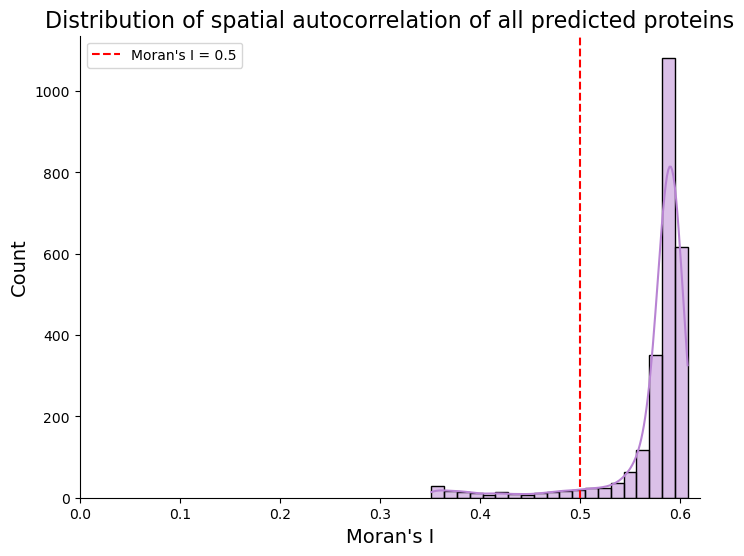

In [4]:
	
# --------------- Calculate Moran's I for all predicted proteins --------------- #
if "spatial_connectivities" not in scP_truth.obsp:
        scP_truth.obsp["spatial_connectivities"] = scP_truth.obsp["connectivities"]

   # Get column names for all predicted proteins
pred_protein_cols = [col for col in scP_truth.obs.columns if col.startswith("pred_protein_") and not col.endswith("smoothed")]

# Calculate Moran's I for all predicted proteins
sq.gr.spatial_autocorr(
    scP_truth,
    mode="moran",
    genes=pred_protein_cols,
    layer=None,
    attr="obs",
)

all_moran_pred = pd.DataFrame({
    "Moran_I": scP_truth.uns["moranI"]["I"],
    "p_value": scP_truth.uns["moranI"]["pval_norm"]
}, index=pred_protein_cols)

# Add protein ID as separate column for easier filtering
all_moran_pred['Protein_ID'] = all_moran_pred.index.str.split('_').str[-1].astype(int)


plt.figure(figsize=(8,6))
sns.histplot(data=all_moran_pred, x="Moran_I", bins=20, kde=True, color="#b883d3")
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.axvline(0.5, color='red', linestyle='--', label="Moran's I = 0.5")
plt.title("Distribution of spatial autocorrelation of all predicted proteins", fontsize=16)
plt.xlabel("Moran's I", fontsize=14)
plt.ylabel("Count",fontsize=14)
# not grid
# x start with 0
plt.xlim(0.0, 0.62)
plt.grid(False)
plt.legend()


C. Calculating Maximum Mean Discrepancy (MMD) at the cell level...
Cell-level MMD comparisons:
CODEX measured vs Predicted proteins:
  Blur: 0.01, MMD predicted to truth: 0.000309
  Blur: 0.02, MMD predicted to truth: 0.001358
  Blur: 0.04, MMD predicted to truth: 0.023983
  Blur: 0.05, MMD predicted to truth: 0.043799
CODEX measured vs RNA expression:
  Blur: 0.01, MMD RNA to truth: 0.001755
  Blur: 0.02, MMD RNA to truth: 0.003954
  Blur: 0.04, MMD RNA to truth: 0.009436
  Blur: 0.05, MMD RNA to truth: 0.013404

t-test: t=0.9558, p=0.3761

Average MMD (across blur values):
  Predicted proteins: 0.017362 ± 0.017956
  RNA expression: 0.007137 ± 0.004573


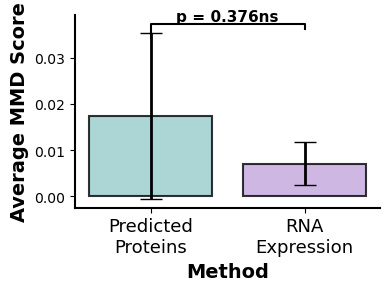

In [5]:
# --------------calculate the MMD -------------- #


from scipy import stats

print("\nC. Calculating Maximum Mean Discrepancy (MMD) at the cell level...")

scRNA_pred = sc.read_h5ad(scRNA_pred_path)
if hasattr(scRNA_pred.X, 'toarray'):
    scRNA_pred.X = scRNA_pred.X.toarray()
scRNA_pred.X = normalize_data(scRNA_pred.X)
fake_p = sc.read_h5ad(fake_p_file_path)
scRNA_pred.uns["protein_predicted_MYID"] = fake_p.var['MYID']
# Extract overlapping indices for consistent comparison
pred_MYID_list = list(scRNA_pred.uns['protein_predicted_MYID'])
truth_MYID_list = list(scP_truth.var["MYID"].astype(int))

# Get indices for overlapping proteins
pred_indices = [pred_MYID_list.index(mid) for mid in overlap_MYIDs]
truth_indices = [np.where(np.array(truth_MYID_list) == mid)[0][0] for mid in overlap_MYIDs]

# Get the data
truth_np = scP_truth.X[:, truth_indices]
pred_np = scRNA_pred.obsm["protein_predicted"][:, pred_indices]

# Get RNA expression data for the same genes if available
rna_np = None
if hasattr(scRNA_pred, 'X') and scRNA_pred.X is not None:
    if pred_indices[0] < scRNA_pred.X.shape[1]:
        rna_np = scRNA_pred.X[:, pred_indices]

# Calculate MMD with different blur values
blur_values = [0.01, 0.02, 0.04, 0.05]
cell_pred_mmd = calculate_mmd_scores(truth_np, pred_np, blur_values)
cell_rna_mmd = calculate_mmd_scores(truth_np, rna_np, blur_values) if rna_np is not None else None

# Print MMD scores
print("Cell-level MMD comparisons:")
mmd_results = {}

if cell_pred_mmd:
    print("CODEX measured vs Predicted proteins:")
    for blur, score in cell_pred_mmd.items():
        print(f"  Blur: {blur}, MMD predicted to truth: {score:.6f}")
        mmd_results[f"pred_blur_{blur}"] = score

if cell_rna_mmd:
    print("CODEX measured vs RNA expression:")
    for blur, score in cell_rna_mmd.items():
        print(f"  Blur: {blur}, MMD RNA to truth: {score:.6f}")
        mmd_results[f"rna_blur_{blur}"] = score

# Calculate mean and std across blur values
pred_scores = [cell_pred_mmd[b] for b in blur_values] if cell_pred_mmd else []
rna_scores = [cell_rna_mmd[b] for b in blur_values] if cell_rna_mmd else []

pred_mean = np.mean(pred_scores) if pred_scores else 0
pred_std = np.std(pred_scores) if pred_scores else 0

rna_mean = np.mean(rna_scores) if rna_scores else 0
rna_std = np.std(rna_scores) if rna_scores else 0

# Calculate p-value using t-test
if cell_pred_mmd and cell_rna_mmd:
    t_stat, p_value = stats.ttest_ind(pred_scores, rna_scores)
    print(f"\nt-test: t={t_stat:.4f}, p={p_value:.4f}")
else:
    p_value = None

print(f"\nAverage MMD (across blur values):")
print(f"  Predicted proteins: {pred_mean:.6f} ± {pred_std:.6f}")
if cell_rna_mmd:
    print(f"  RNA expression: {rna_mean:.6f} ± {rna_std:.6f}")


# Create bar chart
fig, ax = plt.subplots(figsize=(4, 3))

# Prepare data for plotting
categories = []
means = []
stds = []
colors = []

if cell_pred_mmd:
    categories.append('Predicted\nProteins')
    means.append(pred_mean)
    stds.append(pred_std)
    colors.append('#96cccb')

if cell_rna_mmd:
    categories.append('RNA\nExpression')
    means.append(rna_mean)
    stds.append(rna_std)
    colors.append('#c4a5de')

# Create bar plot
x_pos = np.arange(len(categories))
bars = ax.bar(x_pos, means, yerr=stds, capsize=8, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=1.5,
              error_kw={'linewidth': 2, 'ecolor': 'black'})

# Add significance annotation if p-value exists
if p_value is not None and len(categories) == 2:
    # Get the maximum height for the bracket
    y_max = max([m + s for m, s in zip(means, stds)])
    y_bracket = y_max +0.002
    
    # Draw bracket
    ax.plot([0, 0, 1, 1], [y_bracket-0.003, y_bracket , y_bracket , y_bracket-0.001], 
            'k-', linewidth=1.5)
    
    # Add p-value text
    if p_value < 0.001:
        sig_text = 'p < 0.001***'
    elif p_value < 0.01:
        sig_text = f'p = {p_value:.3f}**'
    elif p_value < 0.05:
        sig_text = f'p = {p_value:.3f}*'
    else:
        sig_text = f'p = {p_value:.3f}ns'
    
    ax.text(0.5, y_bracket , sig_text, ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

# Customize plot
ax.set_ylabel('Average MMD Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Method', fontsize=14, fontweight='bold')
# ax.set_title('Cell-level Maximum Mean Discrepancy\n(Average across blur values)', 
#              fontsize=16, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=13)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add grid for readability
ax.yaxis.grid(False)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('pval_mmd_comparison_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()



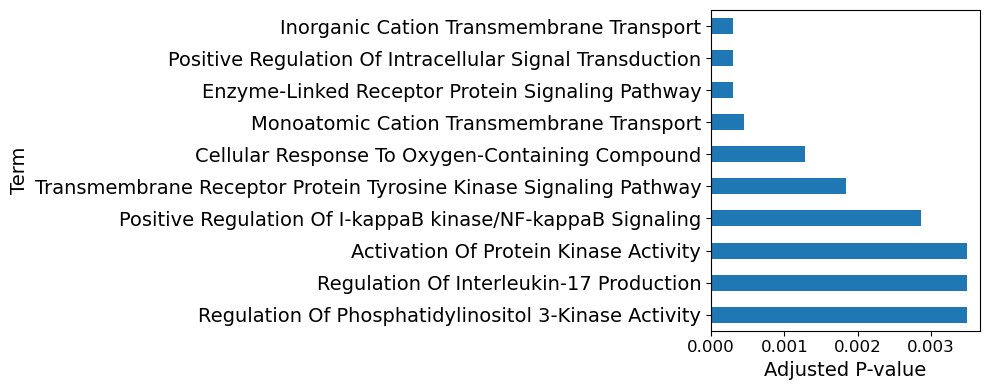

In [6]:
# ----- enrichment analysis for top moran markers ----- #


### use spatial corr rank for ORA

if "spatial_connectivities" not in scP_truth.obsp:
        scP_truth.obsp["spatial_connectivities"] = scP_truth.obsp["connectivities"]

   # Get column names for all predicted proteins
pred_protein_cols = [col for col in scP_truth.obs.columns if col.startswith("pred_protein_") and not col.endswith("smoothed")]

# Calculate Moran's I for all predicted proteins
sq.gr.spatial_autocorr(
    scP_truth,
    mode="moran",
    genes=pred_protein_cols,
    layer=None,
    attr="obs",
)

all_moran_pred = pd.DataFrame({
    "Moran_I": scP_truth.uns["moranI"]["I"],
    "p_value": scP_truth.uns["moranI"]["pval_norm"]
}, index=pred_protein_cols)

# Add protein ID as separate column for easier filtering
all_moran_pred['Protein_ID'] = all_moran_pred.index.str.split('_').str[-1].astype(int)

prot_map = pd.read_csv("/raid/home/yoyowu/spatialpro/data/may14_2484_prot_mapping.csv")
all_moran_pred.merge(prot_map, left_on='Protein_ID', right_on='MYID', how='left')
moran_rank = all_moran_pred.merge(prot_map, left_on='Protein_ID', right_on='MYID', how='left').sort_values("Moran_I", ascending=False)
moran_rank_df = moran_rank.set_index('Approved symbol')['Moran_I']
top_moran_200 = moran_rank_df.head(200)
# Run ORA with top 200 proteins
import gseapy as gp
enr = gp.enrichr(gene_list=top_moran_200.index.tolist(),
                 gene_sets=['GO_Biological_Process_2023', 
               'GO_Molecular_Function_2023',
               'KEGG_2021_Human',
               'Reactome_2022'],
                 organism='Human', 
                 outdir=None, 
                 cutoff=0.5 # only show terms with p-value < 0.05
                )
# visualize the top 10 enriched terms
enr_res = enr.results
import matplotlib.pyplot as plt
# Remove GO IDs from term names
enr_res['Term_clean'] = enr_res['Term'].str.replace(r'\s*\(GO:\d+\)', '', regex=True)


enr_res.head(10).plot.barh(x='Term_clean', y='Adjusted P-value', legend=False, figsize=(10,4))
plt.gca().invert_yaxis()
plt.xlabel('Adjusted P-value', fontsize=14)
plt.ylabel('Term', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.tight_layout()
# save figure
# plt.savefig('liver_top10_enriched_terms_moran_based_ora.png', dpi=300, bbox_inches='tight')
plt.show()


PLOTTING TOP SPATIAL MARKERS PER COMPARTMENT

Plotting malignant/stromal markers...


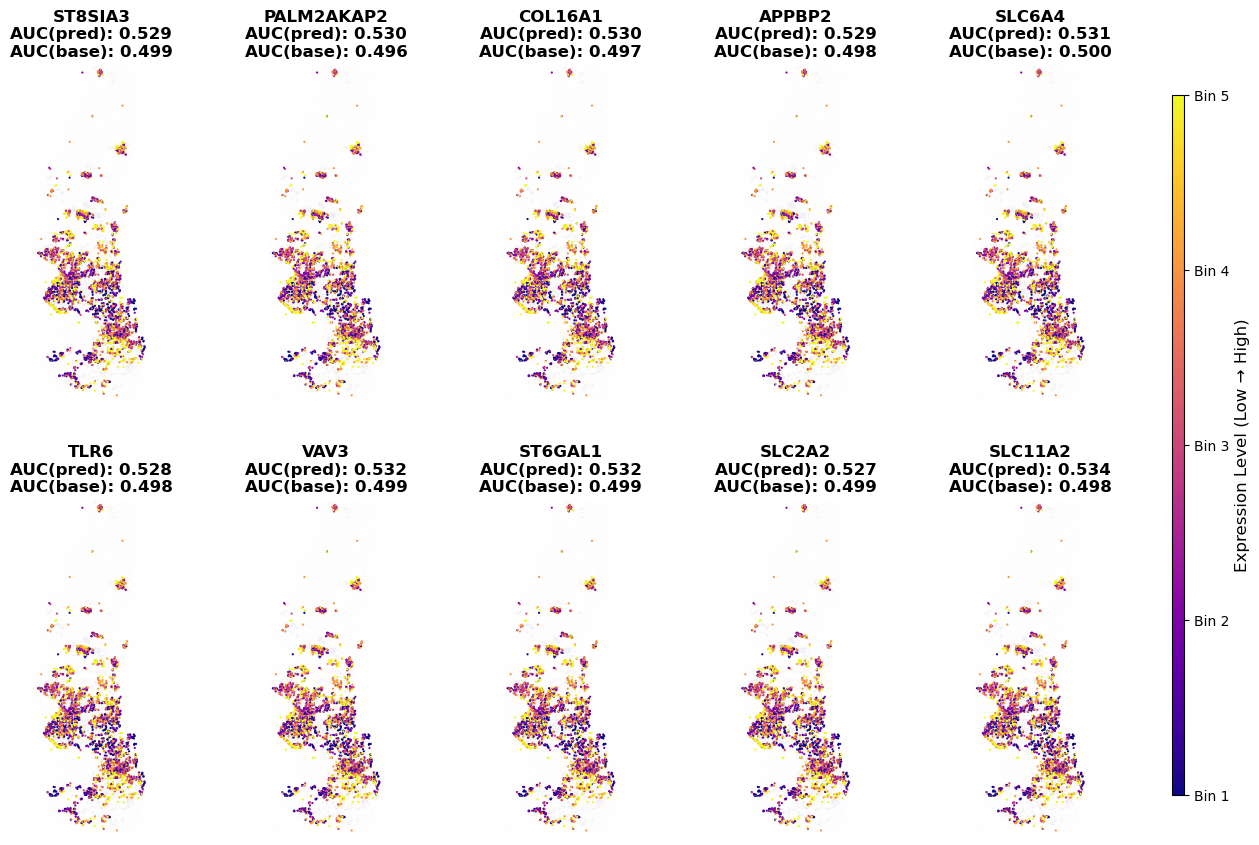

Saved: oct21_top10_spatial_markers_malignant_stromal.png

Plotting lymphoid markers...


In [ ]:

# ============================================================================
# PLOT TOP MARKERS FOR EACH COMPARTMENT
# ============================================================================

print("\n" + "="*70)
print("PLOTTING TOP SPATIAL MARKERS PER COMPARTMENT")
print("="*70)

# Get all unique compartments
# compartments = df_markers_filtered['Compartment'].unique()

for compartment in ['malignant/stromal', 'lymphoid']:
    print(f"\nPlotting {compartment} markers...")
    fig, axes = plot_top_spatial_markers_by_compartment(
        adata=scP_truth,
        img_path="/raid/home/yoyowu/spatialpro/data/HTAPP/HTAPP-783-SMP-4081_HE_1_processed.jpg",
        df_markers_filtered=df_markers_filtered,
        compartment_type=compartment,
        region=region,
        scale=1.0,
        spot_radius=12,
        cmap='plasma',
        alpha=1.0,
        n_bins=5,
        main_fig_size=(15, 10),
        background_alpha=0.1
    )
    if fig is not None:
        filename = f"oct21_top10_spatial_markers_{compartment.replace('/', '_')}.png"
        # plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"Saved: {filename}")



In [ ]:
# --- plot the permutation test result for a compartment --- #

for comp in ['lymphoid', 'malignant/stromal']:
    plot_permutation_test_result(
        df_markers_all, 
        df_markers_filtered, 
        perm_results, 
        compartment=comp, 
        n_permutations=1000
    )